In [1]:
import os
import cv2
from time import time

import numpy as np
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

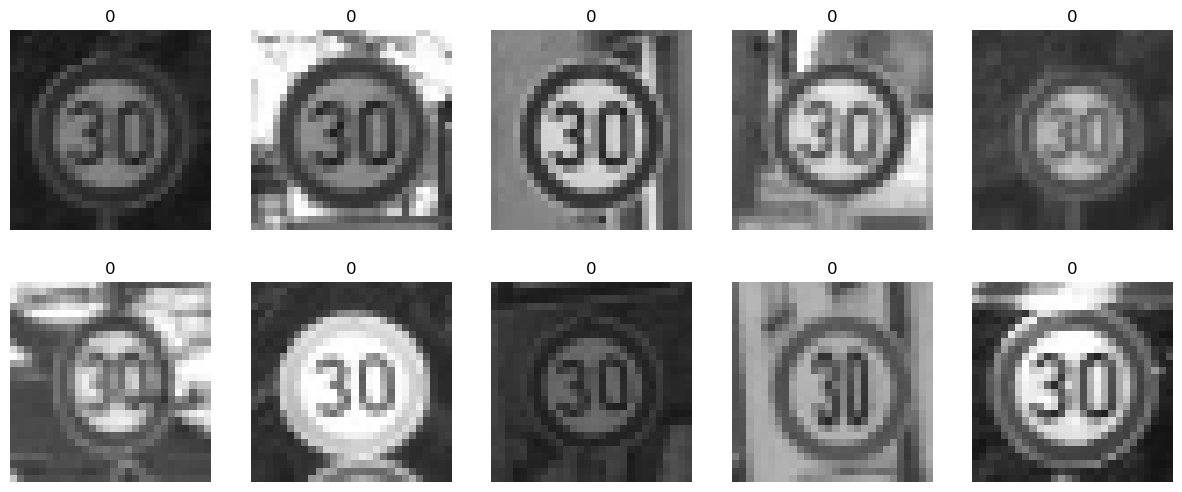

In [2]:
folder = '../data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

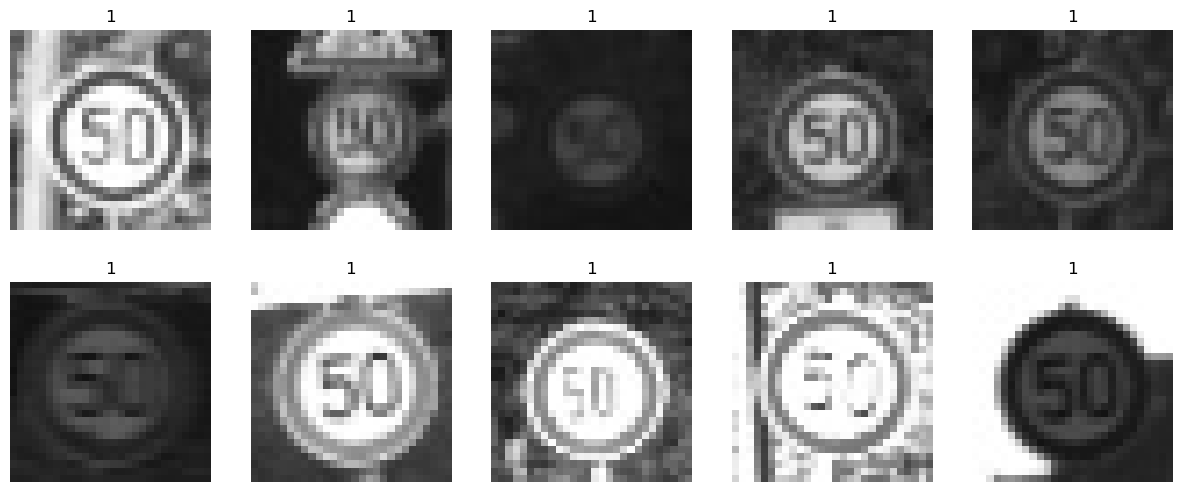

In [3]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [4]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [5]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [6]:
pixels = np.array([image.flatten() for image in images])/255

In [7]:
def run_model(model):
    model.summary()
    model.compile(optimizer ='adam', loss = 'mean_squared_error')

    history = model.fit(pixels, labels, epochs=10, batch_size=32)
    h = history.history

    plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)

    predictions = model.predict(pixels).squeeze()
    predictions = predictions > 0.5

    correct = 0
    for prediction, label in zip(predictions, labels):
        if prediction == label:
            correct = correct + 1

    print('Accuracy', correct/len(labels))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
140/140 [==============================] - 0s 990us/step - loss: 0.3041
Epoch 2/10
140/140 [==============================] - 0s 1ms/step - loss: 0.2103
Epoch 3/10
140/140 [==============================] - 0s 990us/step - loss: 0.1752
Epoch 4/10
140/140 [==============================] - 0s 983us/step - loss: 0.1505
Epoch 5/10
140/140 [==============================] - 0s 990us/step - loss: 0.1336
Epoch 6/10
140/140 [==========================

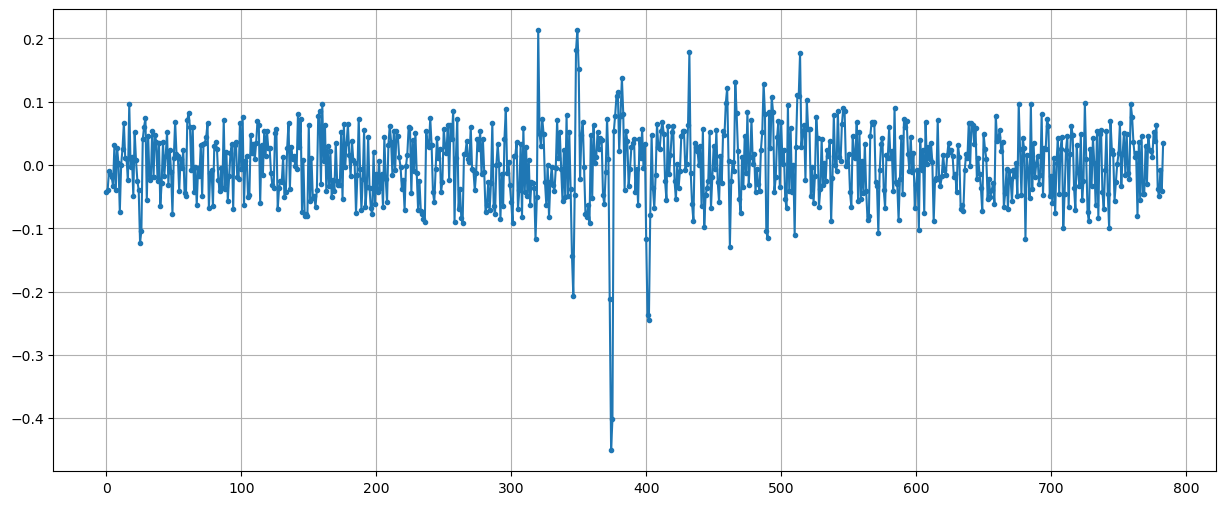

In [8]:
inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

run_model(model)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 50)                39250     
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 39,301
Trainable params: 39,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 0.2931
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1642
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1219
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.

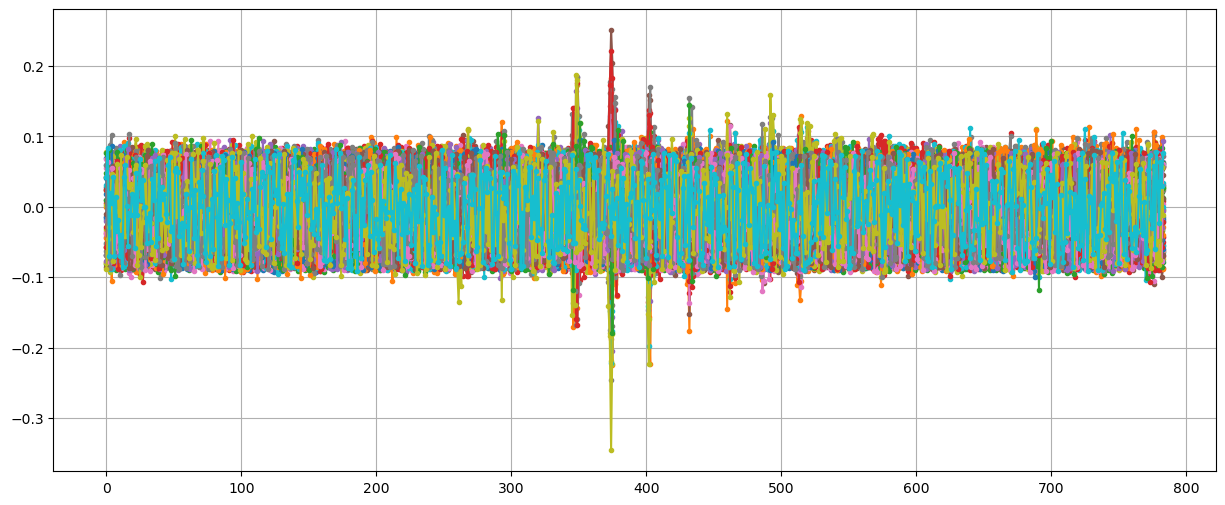

In [15]:
inputs = Input(shape=(pixels.shape[1]))
hidden = Dense(50, activation="relu")(inputs)
outputs = Dense(1, activation="linear")(hidden)
model = Model(inputs, outputs)

run_model(model)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 50)                39250     
                                                                 
 dense_25 (Dense)            (None, 50)                2550      
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 41,851
Trainable params: 41,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 0.2793
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1778
Epoch 3/10
140/140 [====

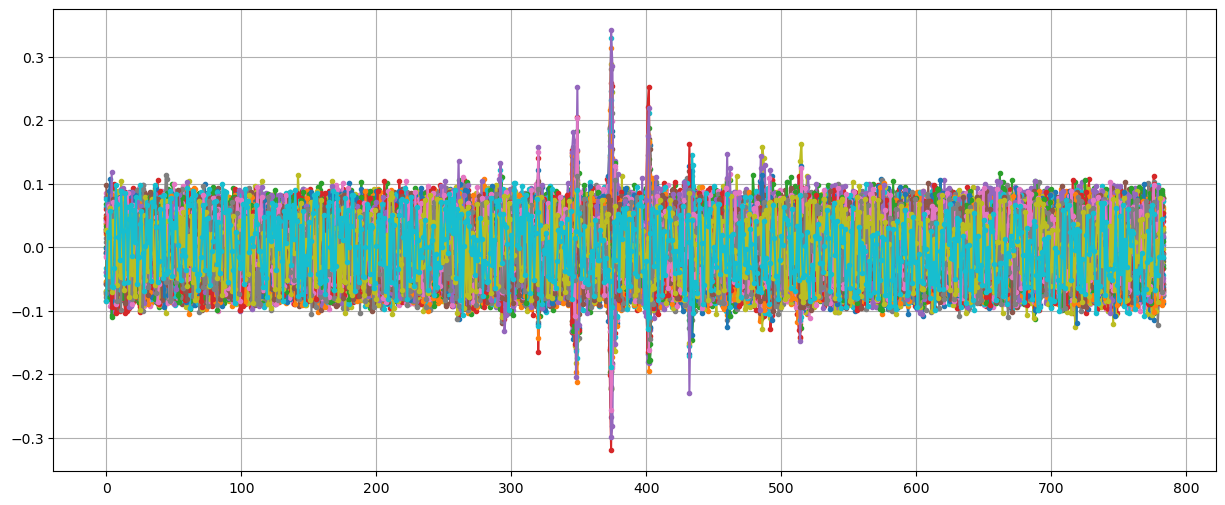

In [18]:
inputs = Input(shape=(pixels.shape[1]))
hidden_1 = Dense(50, activation="leaky_relu")(inputs)
hidden_2 = Dense(50, activation="relu")(hidden_1)
outputs = Dense(1, activation="linear")(hidden_2)
model = Model(inputs, outputs)

run_model(model)

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_35 (Dense)            (None, 200)               157000    
                                                                 
 dense_36 (Dense)            (None, 400)               80400     
                                                                 
 dense_37 (Dense)            (None, 100)               40100     
                                                                 
 dense_38 (Dense)            (None, 1)                 101       
                                                                 
Total params: 277,601
Trainable params: 277,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
140/140 [==============================] 

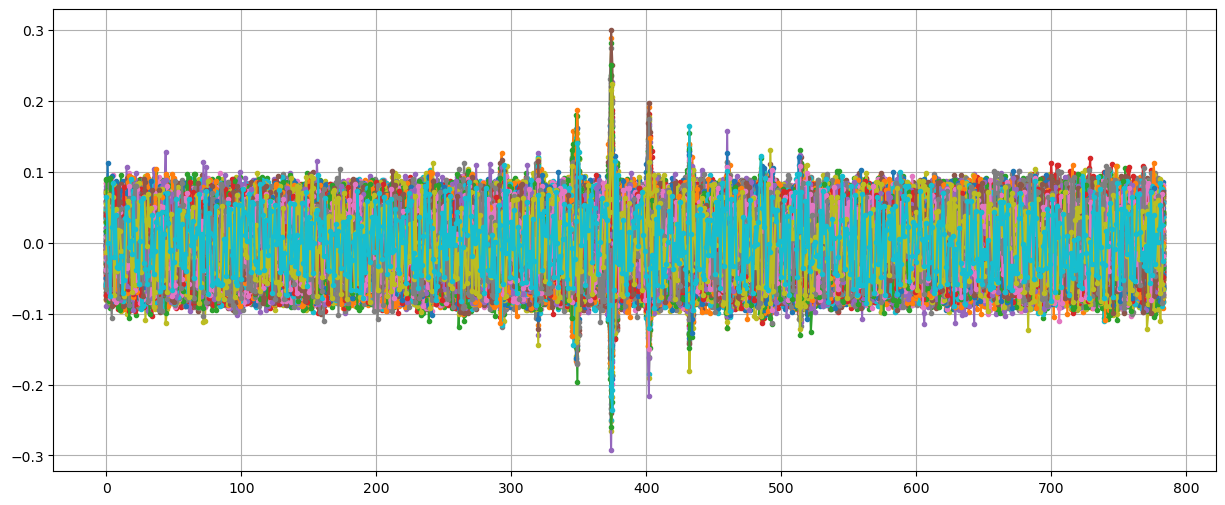

In [21]:
inputs = Input(shape=(pixels.shape[1]))
hidden_1 = Dense(200, activation="leaky_relu")(inputs)
hidden_2 = Dense(400, activation="leaky_relu")(hidden_1)
hidden_3 = Dense(100, activation="relu")(hidden_2)
outputs = Dense(1, activation="linear")(hidden_3)
model = Model(inputs, outputs)

run_model(model)

Increasing neurons in first layer allows increasing accuracy up to ~0.95.5 (with ~50 neurons) \
Further increasing of amount of neurons does not accuracy (tested up to 100 neurons) \

Adding new layers can increase accuracy \
Also training order matters a lot. \
Just repeating neural network training with altering just images order may lead to accuracy change from 0.86 \
to 0.96 for the same dataset and network architecture